In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime

# Индивидуальные параметры, функции

In [2]:
A = np.pi / 2

# Плотность распределения
def f_small(l):
    return 1 / (l**2 + A**2)

# Функция распределения
def F_big(l):
    return 1 / A * np.arctan(l / A)

# Обратная к F_big. [0, 1] -> [0, +inf]
def F_inv(r):
    return A * np.tan(r*A)

dirs = np.array([[0, 1], [1, 0], [0, -1], [-1, 0]])

# Моделирование

In [3]:
M = 100000
# N_list = np.array([100, 1000, 10000, 100000])
N_list = np.logspace(2, 6, 10).astype(int)
init_vals = np.zeros((2,M))
last_vals = np.zeros((len(N_list), 2, M))

In [4]:
N_list

array([    100,     278,     774,    2154,    5994,   16681,   46415,
        129154,  359381, 1000000])

In [5]:
init_vals

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
first_particle = [np.zeros((N,2)) for N in N_list]
for i, N in enumerate(N_list):
    curr_vals = init_vals.copy()
    for j in tqdm(range(N)):
        first_particle[i][j] = curr_vals[:,0]
        curr_l = F_inv(np.random.uniform(0, 1, size=M))
        curr_dirs = dirs[np.random.randint(0,4, size=M)].T
        curr_vals += curr_l * curr_dirs
        # assert curr_vals.shape == (2, M)
    last_vals[i] = curr_vals

100%|██████████| 1000000/1000000 [3:22:49<00:00, 82.17it/s]  


In [8]:
np.save(f'last_vals_{i}.npy', last_vals)
for i, N in enumerate(N_list):
    np.save(f'first_particle_{N}_{i}.npy', first_particle[i])

# for i, N in enumerate(N_list):
#     _fp = np.load(f'first_particle_{N}_23070212.npy')
#     first_particle[i] = _fp

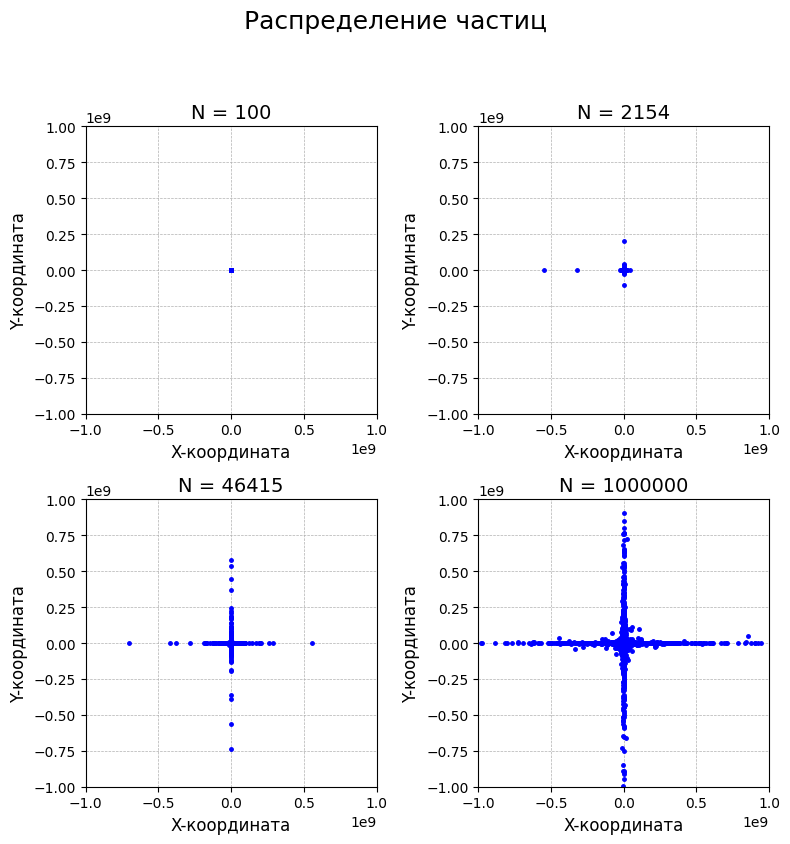

In [11]:
ax_lim = 1e9
# Настроим количество строк и столбцов
n_cols = 2  # два столбца
n_rows = len(N_list[::3]) // 2 + len(N_list[::3]) % 2  # рассчитываем количество строк

plt.figure(figsize=(4 * n_cols, 4 * n_rows))
plt.suptitle('Распределение частиц', fontsize=18, y=1.05)

for i, N in enumerate(N_list[::3]):
    row = i // n_cols  # номер строки
    col = i % n_cols   # номер столбца

    plt.subplot(n_rows, n_cols, 1 + row * n_cols + col)
    plt.title(f'N = {N}', fontsize=14)

    # Изменим цвет и маркер для улучшения визуализации
    plt.plot(last_vals[3*i, 0, :], last_vals[3*i, 1, :], '.', color='b', markersize=5)

    # Добавим подписи осей
    plt.xlabel('X-координата', fontsize=12)
    plt.ylabel('Y-координата', fontsize=12)

    # Установим ограничения осей и добавим сетку
    plt.xlim(-ax_lim, ax_lim)
    plt.ylim(-ax_lim, ax_lim)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Добавим отступы между подграфиками
plt.tight_layout()
plt.show()


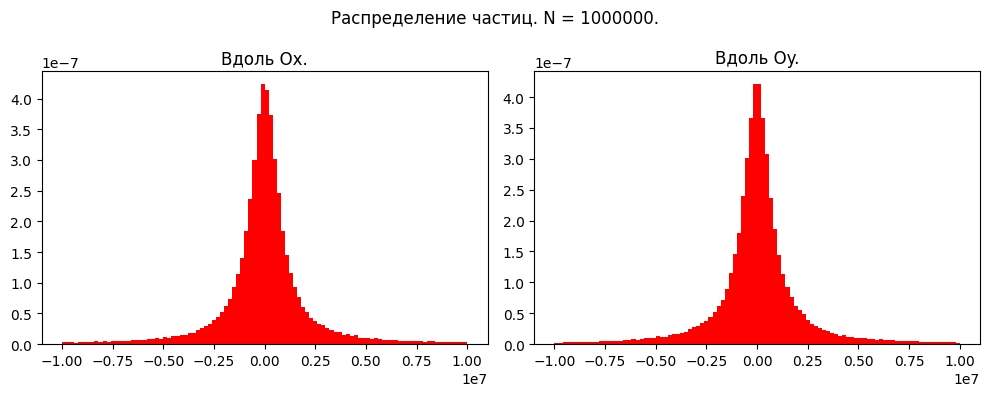

In [13]:
bin_cnt = 100
bin_w = 1/bin_cnt
_idx = 9
plt.figure(figsize=(10, 4))
plt.suptitle(f'Раcпределение частиц. N = {N_list[_idx]}.')

plt.subplot(1,2,1)
plt.hist(last_vals[_idx,0,:], bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Ox.')

plt.subplot(1,2,2)
plt.hist(last_vals[_idx,1,:], bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Oy.')

plt.tight_layout()
plt.show()

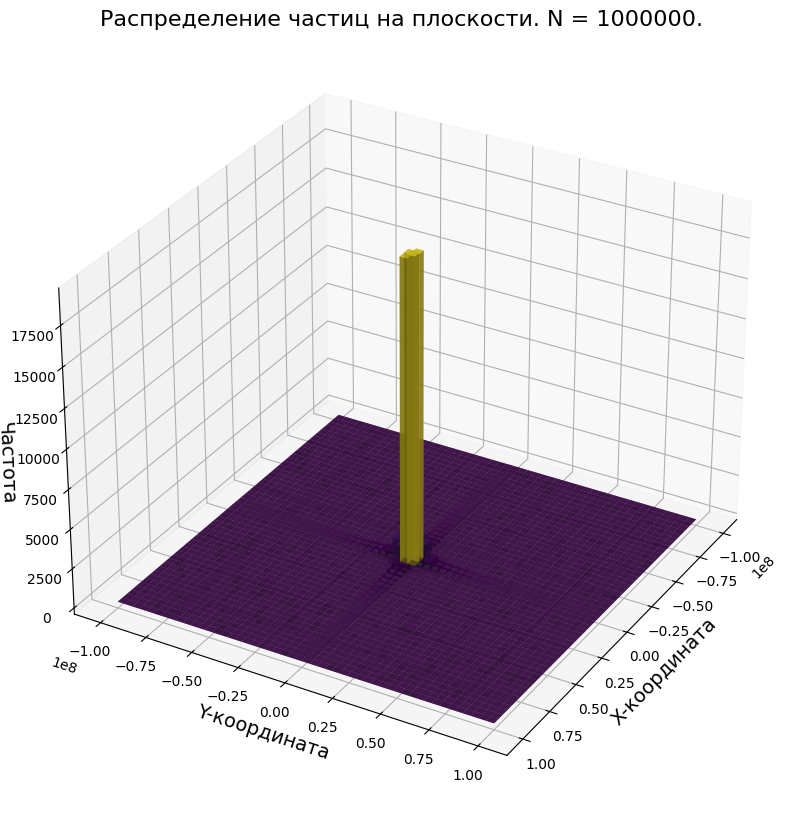

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Данные для графика
x, y = last_vals[_idx, 0, :], last_vals[_idx, 1, :]
_lim = 1e8
_bins = 50
hist, xedges, yedges = np.histogram2d(x, y, bins=_bins, range=[[-_lim, _lim], [-_lim, _lim]])

# Подготовка координат для столбцов
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

dx = dy = np.ones_like(zpos) * 2 * _lim / _bins
dz = hist.ravel()

# Настроим цвета
colors = plt.cm.viridis(dz / max(dz))  # Используем цветовую карту viridis для столбцов

# Построение 3D-гистограммы
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color=colors, alpha=0.7)

# Добавление подписей осей
ax.set_xlabel('X-координата', fontsize=14)
ax.set_ylabel('Y-координата', fontsize=14)
ax.set_zlabel('Частота', fontsize=14)

# Настройка заголовка
ax.set_title(f'Распределение частиц на плоскости. N = {N_list[_idx]}.', fontsize=16)

# Добавление сетки для лучшей видимости
ax.grid(True)

# Поворот камеры для лучшего восприятия
ax.view_init(elev=30, azim=30)

plt.show()


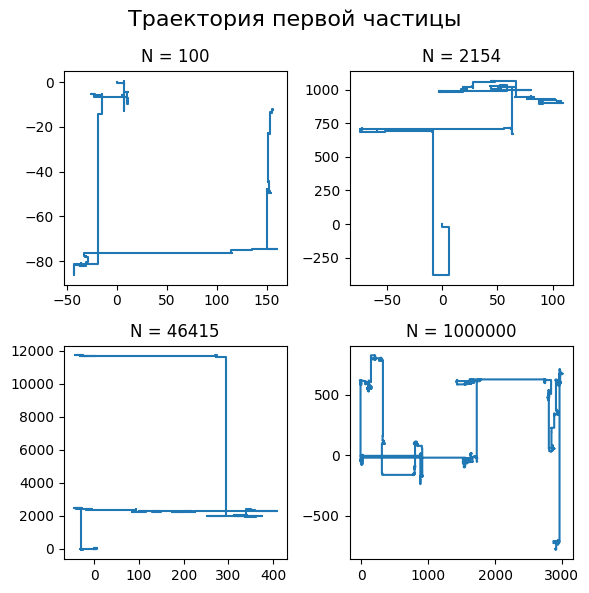

In [17]:
plt.figure(figsize=(6, 6))
plt.suptitle('Траектория первой частицы', fontsize=16)
for i, N in enumerate(N_list[::3]):
    plt.subplot(2, len(N_list[::3]) // 2, 1 + i)
    plt.title(f'N = {N}')
    plt.plot(first_particle[i][:,0], first_particle[i][:,1], '-')
    # plt.plot(first_particle[i][:,0], first_particle[i][:,1], '.')
plt.tight_layout()
plt.show()

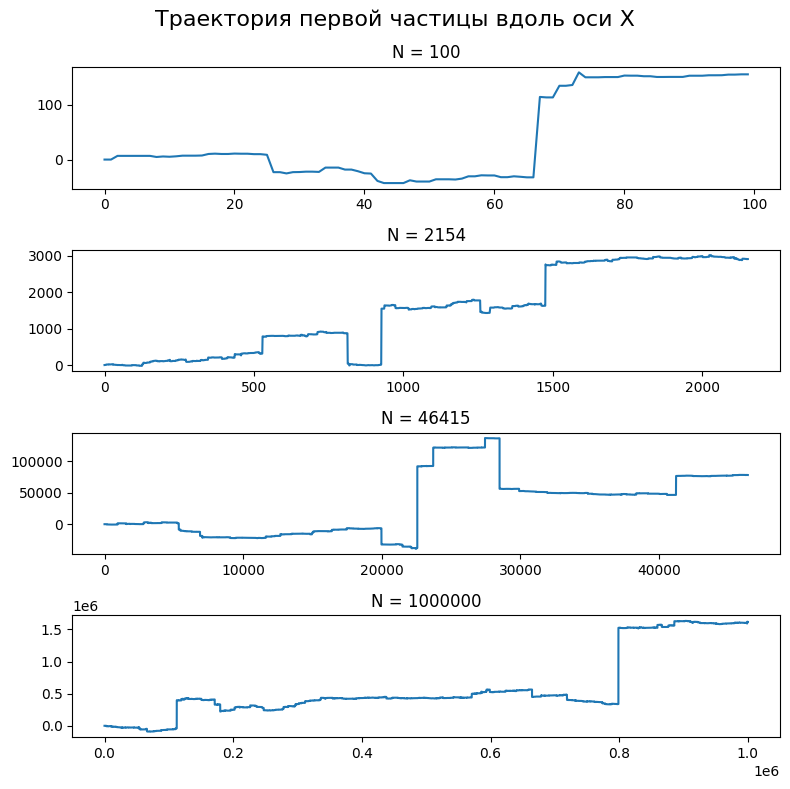

In [18]:
plt.figure(figsize=(8, 2*len(N_list[::3])))
plt.suptitle('Траектория первой частицы вдоль оси X', fontsize=16)
for pl_idx, (i, N) in enumerate(list(enumerate(N_list[::]))[::3]):
    plt.subplot(len(N_list[::3]), 1, 1 + pl_idx)
    plt.title(f'N = {N}')
    plt.plot(first_particle[i][:,0], '-')
plt.tight_layout()
plt.show()

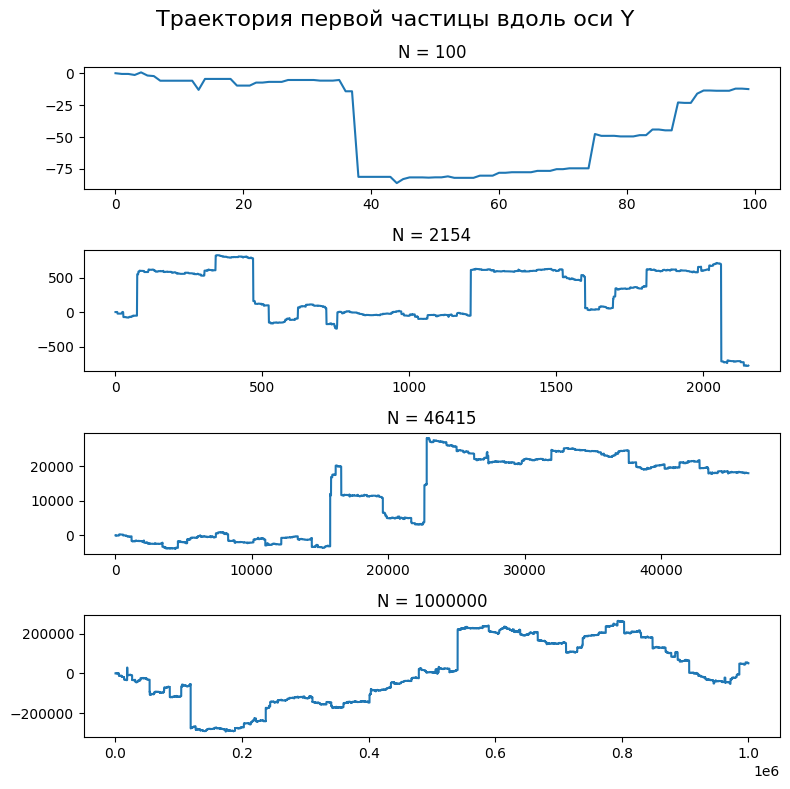

In [19]:
plt.figure(figsize=(8, 2*len(N_list[::3])))
plt.suptitle('Траектория первой частицы вдоль оси Y', fontsize=16)
for pl_idx, (i, N) in enumerate(list(enumerate(N_list[::]))[::3]):
    plt.subplot(len(N_list[::3]), 1, 1 + pl_idx)
    plt.title(f'N = {N}')
    plt.plot(first_particle[i][:,1], '-')
plt.tight_layout()
plt.show()

In [20]:
# длины случайных шагов первой частицы (сдвиги)
shifts_arr_lastN = np.abs((first_particle[-1][1:] - first_particle[-1][:-1]).sum(axis=1))
shifts_arr_lastN.shape

(999999,)

In [21]:
sig = 2 / (f_small(0)*np.sqrt(2*np.pi) )

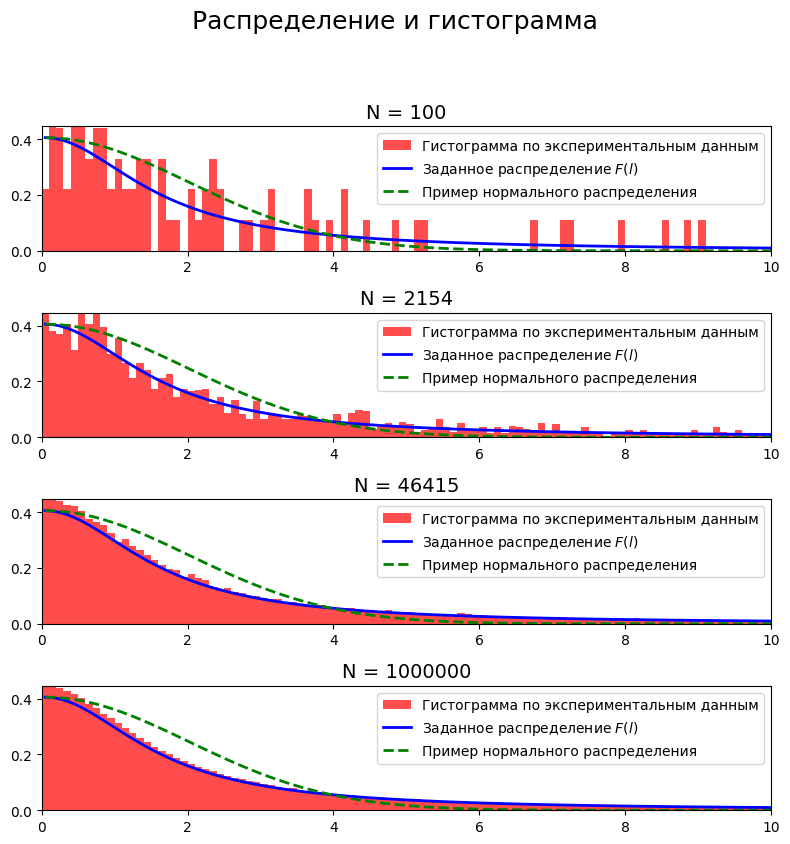

In [22]:
bin_cnt = 100  # кол-во столбиков
bin_w = 1 / bin_cnt
rng = (0, 10)  # диапазон отрисовки

_r = lambda x: 2 / np.sqrt(2 * np.pi * sig ** 2) * np.exp(-(x ** 2) / (2 * sig ** 2))

plt.figure(figsize=(8, 2 * len(N_list[::3])))
plt.suptitle('Распределение и гистограмма', fontsize=18, y=1.05)

for pl_idx, (i, N) in enumerate(list(enumerate(N_list[::]))[::3]):
    plt.subplot(len(N_list[::3]), 1, 1 + pl_idx)
    shifts_arr = np.abs((first_particle[i][1:] - first_particle[i][:-1]).sum(axis=1))

    # Гистограмма
    plt.hist(shifts_arr, bin_cnt, facecolor='r', density=True, range=rng, label='Гистограмма по экспериментальным данным', alpha=0.7)

    # Добавляем линии
    x_vals = np.linspace(rng[0], rng[1], bin_cnt)
    plt.plot(x_vals + (rng[1] - rng[0]) * 0.5 * bin_w, f_small(x_vals), 'b-', label='Заданное распределение $F(l)$', linewidth=2)
    plt.plot(x_vals + (rng[1] - rng[0]) * 0.5 * bin_w, _r(x_vals), 'g--', label='Пример нормального распределения', linewidth=2)

    # Настройка заголовка и подписей осей
    plt.title(f'N = {N}', fontsize=14)
    # plt.xlabel('Сдвиг', fontsize=12)
    # plt.ylabel('Плотность вероятности', fontsize=12)

    # Легенда
    plt.legend(loc='upper right', fontsize=10)

    # Границы осей
    plt.xlim(rng)
    plt.ylim(0, max(f_small(x_vals).max(), _r(x_vals).max()) * 1.1)

# Автоматические отступы
plt.tight_layout()
plt.show()


In [23]:
mean_vals = last_vals.mean(axis=2)
sq_mean_vals = (mean_vals**2)
r_vals = sq_mean_vals.sum(axis=1)**0.5
mean_sq_vals = (last_vals**2).mean(axis=2)
var_vals = last_vals.var(axis=2)
full_var_vals = var_vals.sum(axis=1)

In [25]:
import pandas as pd

# Создаем список данных для каждой строки
data = []

for i, N in enumerate(N_list):
    data.append({
        'N': N,
        '<x>': mean_vals[i, 0],
        '<y>': mean_vals[i, 1],
        '<R>': r_vals[i],
        '<x^2>': mean_sq_vals[i, 0],
        '<y^2>': mean_sq_vals[i, 1],
        '<Δx^2>': var_vals[i, 0],
        '<Δy^2>': var_vals[i, 1],
        '<ΔR^2>': full_var_vals[i]
    })

# Создаем DataFrame
df = pd.DataFrame(data)

# Выводим DataFrame
print(df)


         N           <x>           <y>           <R>         <x^2>  \
0      100 -5.074448e+01 -2.011551e+01  5.458604e+01  3.237921e+08   
1      278  3.606890e+02  7.865766e+01  3.691661e+02  7.205361e+09   
2      774  1.113131e+03 -7.172144e+02  1.324182e+03  2.254243e+11   
3     2154 -9.027212e+03  1.124644e+03  9.096998e+03  4.126361e+12   
4     5994  4.497143e+03  3.674236e+04  3.701656e+04  3.128362e+12   
5    16681 -1.436397e+04  8.545517e+03  1.671375e+04  4.176885e+13   
6    46415 -7.504991e+03  3.782859e+04  3.856588e+04  3.094471e+13   
7   129154  1.841060e+05 -2.963140e+03  1.841298e+05  3.196837e+15   
8   359381 -2.581440e+04 -7.576042e+05  7.580438e+05  4.137909e+15   
9  1000000 -1.158618e+07 -5.279569e+06  1.273237e+07  6.694786e+18   

          <y^2>        <Δx^2>        <Δy^2>        <ΔR^2>  
0  1.372699e+08  3.237895e+08  1.372695e+08  4.610590e+08  
1  4.083222e+09  7.205231e+09  4.083215e+09  1.128845e+10  
2  2.790017e+11  2.254230e+11  2.790012e+11  5.04

In [28]:
df.to_excel('results.xlsx', index=False)

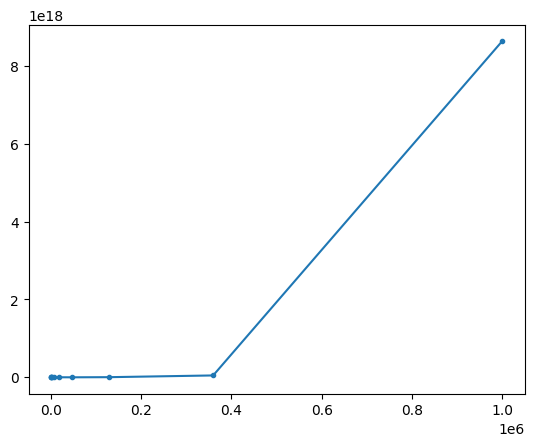

In [29]:
plt.plot(N_list,df['<ΔR^2>'], '.-')

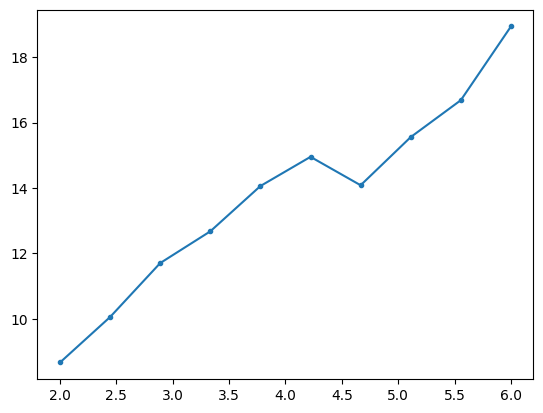

In [30]:
plt.plot(np.log10(N_list), np.log10(df['<ΔR^2>']) , '.-')

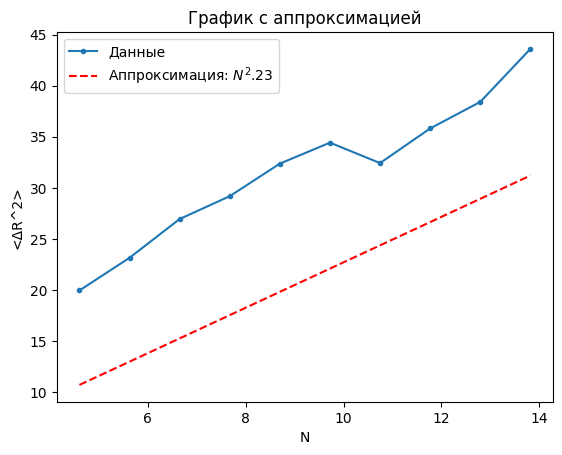

Коэффициент v: 2.2257898665749827


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Преобразуем данные для логарифмической аппроксимации
log_N = np.log(N_list)
log_delta_R2 = np.log(df['<ΔR^2>'])

# Аппроксимация методом наименьших квадратов
coefficients = np.polyfit(log_N, log_delta_R2, 1)

# Извлекаем коэффициент v
v = coefficients[0]

# Строим график
plt.plot(log_N, log_delta_R2, '.-', label='Данные')
plt.plot(log_N, np.log((np.pi / 2) * N_list**v), '--r', label=f'Аппроксимация: $N^{v:.2f}$')  # Линия аппроксимации
plt.xlabel('N')
plt.ylabel('<ΔR^2>')
plt.legend()
plt.title('График с аппроксимацией')
plt.show()

print(f'Коэффициент v: {v}')

